In [ ]:
# target variable - winning percentage in playoffs look at last 12 seasons
# predictor variables - reg season stats

In [16]:
import json
with open('list_of_playoff_teams.json','r') as team_file:
    list_of_playoff_dicts = json.load(team_file)

In [17]:
list_of_playoff_dicts

[{'2': '20182019',
  '5': '20182019',
  '6': '20182019',
  '10': '20182019',
  '12': '20182019',
  '14': '20182019',
  '15': '20182019',
  '18': '20182019',
  '19': '20182019',
  '52': '20182019',
  '20': '20182019',
  '21': '20182019',
  '54': '20182019',
  '25': '20182019',
  '28': '20182019',
  '29': '20182019'},
 {'1': '20172018',
  '4': '20172018',
  '5': '20172018',
  '6': '20172018',
  '10': '20172018',
  '14': '20172018',
  '15': '20172018',
  '18': '20172018',
  '52': '20172018',
  '21': '20172018',
  '54': '20172018',
  '24': '20172018',
  '26': '20172018',
  '28': '20172018',
  '29': '20172018',
  '30': '20172018'},
 {'3': '20162017',
  '5': '20162017',
  '6': '20162017',
  '8': '20162017',
  '9': '20162017',
  '10': '20162017',
  '15': '20162017',
  '16': '20162017',
  '18': '20162017',
  '19': '20162017',
  '20': '20162017',
  '22': '20162017',
  '24': '20162017',
  '28': '20162017',
  '29': '20162017',
  '30': '20162017'},
 {'2': '20152016',
  '3': '20152016',
  '4': '201

In [6]:
import requests

In [12]:
# function that takes in a list of dictionaries where each dictionary is made up of 
# key value pairs where the keys are each teamID and the values are the seasonIDs
# for each team that played in that season's playoffs
def get_regseason_stats(list_of_dicts):
    # empty list to hold our team-level stats 
    team_stats = []
    # iterate through the list of dictionaries
    for team_season_dicts in list_of_dicts:
        for k,v in team_season_dicts.items():
            teamID = k
            seasonID = v
            url = f'https://statsapi.web.nhl.com/api/v1/teams/{teamID}?expand=team.stats&season={seasonID}'
            response = requests.get(url)
            data = response.json()['teams'][0]['teamStats'][0]['splits'][0]['stat']
            data['teamID'] = teamID
            data['seasonID'] = seasonID
            team_stats.append(data)
    return team_stats

In [18]:
team_stats_all_seasons = get_regseason_stats(list_of_playoff_dicts)

In [20]:
team_stats_all_seasons

[{'gamesPlayed': 82,
  'wins': 48,
  'losses': 27,
  'ot': 7,
  'pts': 103,
  'ptPctg': '62.8',
  'goalsPerGame': 2.72,
  'goalsAgainstPerGame': 2.329,
  'evGGARatio': 1.2756,
  'powerPlayPercentage': '14.5',
  'powerPlayGoals': 33.0,
  'powerPlayGoalsAgainst': 44.0,
  'powerPlayOpportunities': 227.0,
  'penaltyKillPercentage': '79.9',
  'shotsPerGame': 28.7805,
  'shotsAllowed': 30.9024,
  'winScoreFirst': 0.689,
  'winOppScoreFirst': 0.459,
  'winLeadFirstPer': 0.71,
  'winLeadSecondPer': 0.85,
  'winOutshootOpp': 0.531,
  'winOutshotByOpp': 0.646,
  'faceOffsTaken': 4477.0,
  'faceOffsWon': 2124.0,
  'faceOffsLost': 2353.0,
  'faceOffWinPercentage': '47.4',
  'shootingPctg': 9.4,
  'savePctg': 0.925,
  'teamID': '2',
  'seasonID': '20182019'},
 {'gamesPlayed': 82,
  'wins': 44,
  'losses': 26,
  'ot': 12,
  'pts': 100,
  'ptPctg': '61.0',
  'goalsPerGame': 3.305,
  'goalsAgainstPerGame': 2.902,
  'evGGARatio': 1.2133,
  'powerPlayPercentage': '24.6',
  'powerPlayGoals': 56.0,
  'pow

In [ ]:
with open('team_stats_all_seasons.json','w') as team_stats_file:
    json.dump(team_stats_all_seasons,team_stats_file)

In [150]:
import json
with open('second_list_of_playoff_teams.json','r') as team_file:
    second_list_of_playoff_dicts = json.load(team_file)

In [435]:
# remove random world cup keys
# second_list_of_playoff_dicts[3].pop('7401')

{'1': '20032004',
 '2': '20032004',
 '4': '20032004',
 '6': '20032004',
 '8': '20032004',
 '9': '20032004',
 '10': '20032004',
 '14': '20032004',
 '17': '20032004',
 '18': '20032004',
 '19': '20032004',
 '20': '20032004',
 '21': '20032004',
 '23': '20032004',
 '25': '20032004',
 '28': '20032004'}

In [157]:
team_stats_all_seasons2 = get_regseason_stats(second_list_of_playoff_dicts[0:2])

In [159]:
with open('team_stats_all_seasons2.json','w') as team_stats_file:
    json.dump(team_stats_all_seasons2,team_stats_file)

In [436]:
team_stats_all_seasons3 = get_regseason_stats(second_list_of_playoff_dicts[3:])

In [437]:
with open('team_stats_all_seasons3.json','w') as team_stats_file:
    json.dump(team_stats_all_seasons3,team_stats_file)

In [32]:
import pandas as pd
pd.set_option('display.max_columns',100)

In [438]:
df1 = pd.DataFrame(team_stats_all_seasons)
df2 = pd.DataFrame(team_stats_all_seasons2)
df3 = pd.DataFrame(team_stats_all_seasons3)

In [439]:
df = pd.concat([df1,df2,df3])

In [440]:
len(df)

304

In [441]:
df['teamID_seasonID'] = df['teamID'].str.cat(df['seasonID'], sep = "_")


In [442]:
df.drop(['teamID','seasonID'],axis=1,inplace=True)

In [443]:
df.columns

Index(['evGGARatio', 'faceOffWinPercentage', 'faceOffsLost', 'faceOffsTaken',
       'faceOffsWon', 'gamesPlayed', 'goalsAgainstPerGame', 'goalsPerGame',
       'losses', 'ot', 'penaltyKillPercentage', 'powerPlayGoals',
       'powerPlayGoalsAgainst', 'powerPlayOpportunities',
       'powerPlayPercentage', 'ptPctg', 'pts', 'savePctg', 'shootingPctg',
       'shotsAllowed', 'shotsPerGame', 'winLeadFirstPer', 'winLeadSecondPer',
       'winOppScoreFirst', 'winOutshootOpp', 'winOutshotByOpp',
       'winScoreFirst', 'wins', 'teamID_seasonID'],
      dtype='object')

In [444]:
df.head()

,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed,goalsAgainstPerGame,goalsPerGame,losses,ot,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,shootingPctg,shotsAllowed,shotsPerGame,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins,teamID_seasonID
0,1.2756,47.4,2353.0,4477.0,2124.0,82,2.329,2.720,27,7,79.9,33.0,44.0,227.0,14.5,62.8,103,0.925,9.4,30.9024,28.7805,0.710,0.850,0.459,0.531,0.646,0.689,48,2_20182019
1,1.2133,50.6,2426.0,4908.0,2482.0,82,2.902,3.305,26,12,79.7,56.0,45.0,228.0,24.6,61.0,100,0.913,9.9,33.2805,33.3049,0.750,0.923,0.457,0.417,0.634,0.596,44,5_20182019
2,1.2266,50.7,2385.0,4840.0,2455.0,82,2.585,3.134,24,9,79.9,65.0,49.0,251.0,25.9,65.2,107,0.912,9.6,29.4634,32.6829,0.806,0.838,0.417,0.563,0.625,0.739,49,6_20182019
3,1.2047,53.0,2330.0,4959.0,2629.0,82,3.037,3.488,28,8,79.9,46.0,41.0,211.0,21.8,61.0,100,0.908,10.5,33.1341,33.3659,0.828,0.973,0.375,0.571,0.561,0.738,46,10_20182019
4,1.0878,49.0,2532.0,4968.0,2436.0,82,2.695,2.963,29,7,81.6,44.0,44.0,247.0,17.8,60.4,99,0.906,8.6,28.5732,34.4146,0.862,0.872,0.333,0.509,0.708,0.767,46,12_20182019


In [181]:
# join the two lists of playoff dictionaries

all_team_season_dicts = list_of_playoff_dicts + second_list_of_playoff_dicts

# only take values which are seasonIDs from season dictionaries (ignore keys which are teamIDs) 
# since API only requires seasonID for shot data
all_seasons = []
for i in all_team_season_dicts:
    all_seasons.append(list(set(i.values())))
    
# remove duplicate seasons and concat the lists into one list
for i in all_season
set(all_seasons)

# remove nested structure and return list of seasons
from itertools import chain
all_seasons = list(chain.from_iterable(all_seasons))

In [186]:
# shot type data for each team and season

def get_regseason_shot_stats(list_of_seasons):
    # empty list to hold our team shot stats 
    team_shots_stats = []
    # iterate through the list of seasons
    for seasonID in list_of_seasons:
        season_url = f"https://api.nhle.com/stats/rest/team?isAggregate=false&reportType=core&isGame=false&reportName=shottype&sort=[{{%22property%22:%22shots%22,%22direction%22:%22DESC%22}}]&cayenneExp=leagueId=133%20and%20gameTypeId=2%20and%20seasonId%3E={seasonID}%20and%20seasonId%3C={seasonID}"
        response = requests.get(season_url)
        data = response.json()
        for i in data:
            team_shots = data[i]
            team_shots_stats.append(team_shots)
    return team_shots_stats

In [187]:
shot_data_allseasons = get_regseason_shot_stats(all_seasons)

In [333]:
def get_regseason_defense_stats(list_of_seasons):
    # empty list to hold our team shot stats 
    team_defense_stats = []
    # iterate through the list of seasons
    for seasonID in list_of_seasons:
        season_url = f"https://api.nhle.com/stats/rest/team?isAggregate=false&reportType=basic&isGame=false&reportName=realtime&sort=[{{%22property%22:%22hits%22,%22direction%22:%22DESC%22}}]&cayenneExp=leagueId=133%20and%20gameTypeId=2%20and%20seasonId%3E={seasonID}%20and%20seasonId%3C={seasonID}"
        response = requests.get(season_url)
        data = response.json()['data']
        for team_defense in data:
            team_defense_stats.append(team_defense)
    return team_defense_stats

In [334]:
defense_data_allseasons = get_regseason_defense_stats(all_seasons)

In [342]:
defense_data_allseasons

[{'blockedShots': 1229,
  'faceoffWinPctg': 0.5057,
  'faceoffs': 4908,
  'faceoffsLost': 2426,
  'faceoffsWon': 2482,
  'gamesPlayed': 82,
  'giveaways': 825,
  'goalsFor': 271,
  'hits': 2363,
  'losses': 26,
  'missedShots': 912,
  'otLosses': 12,
  'points': 100,
  'seasonId': 20182019,
  'shootingPctg': 0.0992,
  'shotsFor': 2731,
  'takeaways': 633,
  'teamAbbrev': 'PIT',
  'teamFullName': 'Pittsburgh Penguins',
  'teamId': 5,
  'ties': 0,
  'wins': 44},
 {'blockedShots': 1118,
  'faceoffWinPctg': 0.5039,
  'faceoffs': 4923,
  'faceoffsLost': 2442,
  'faceoffsWon': 2481,
  'gamesPlayed': 82,
  'giveaways': 749,
  'goalsFor': 246,
  'hits': 2268,
  'losses': 32,
  'missedShots': 1069,
  'otLosses': 7,
  'points': 93,
  'seasonId': 20182019,
  'shootingPctg': 0.0874,
  'shotsFor': 2814,
  'takeaways': 903,
  'teamAbbrev': 'VGK',
  'teamFullName': 'Vegas Golden Knights',
  'teamId': 54,
  'ties': 0,
  'wins': 43},
 {'blockedShots': 1170,
  'faceoffWinPctg': 0.4941,
  'faceoffs': 493

In [339]:
with open('defense_data_allseasons.json','w') as team_stats_file:
    json.dump(defense_data_allseasons,team_stats_file)

In [445]:
# create a new dataframe to hold our defense stats
df2 = pd.DataFrame(defense_data_allseasons)

In [453]:
df2.columns

Index(['blockedShots', 'faceoffWinPctg', 'faceoffs', 'faceoffsLost',
       'faceoffsWon', 'gamesPlayed', 'giveaways', 'goalsFor', 'hits', 'losses',
       'missedShots', 'otLosses', 'points', 'shootingPctg', 'shotsFor',
       'takeaways', 'teamAbbrev', 'teamFullName', 'ties', 'wins',
       'teamID_seasonID'],
      dtype='object')

In [446]:
# create one unique column for team and season ID, drop others
df2['teamId'] = df2['teamId'].astype(str)
df2['seasonId']=df2['seasonId'].astype(str)
df2['teamID_seasonID'] = df2['teamId'].str.cat(df2['seasonId'], sep = "_")
df2.drop(['teamId','seasonId'],axis=1,inplace=True)

In [447]:
# merge master dataframe and defense df
df = pd.merge(df,df2,on='teamID_seasonID')

In [448]:
# drop repeated columns
df.drop(['wins_y','losses_y','gamesPlayed_y','shootingPctg_y'],axis=1,inplace=True)

In [449]:
len(df)

304

In [459]:
len(df.columns)

45

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128943f60>]],
      dtype=object)

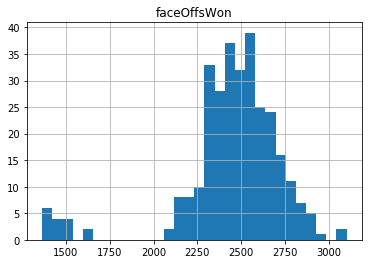

In [451]:
df.hist(column=['faceOffsWon'],bins=30)

In [460]:
with open('all_team_stats_list.json','r') as team_file:
    all_team_stats_list = json.load(team_file)

In [462]:
df4 = pd.DataFrame(all_team_stats_list)

In [466]:
df = pd.merge(df,df4,on='teamID_seasonID')

In [471]:
df.rename(columns={'games':'games_playoffs','goals':'goals_playoffs','wins':'wins_playoffs'},inplace=True)

In [473]:
df.set_index('teamID_seasonID',inplace=True)

In [475]:
df['playoff_performance'] = df['wins_playoffs']/df['games_playoffs']

In [476]:
df.head()

,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed_x,goalsAgainstPerGame,goalsPerGame,losses_x,ot,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,shootingPctg_x,shotsAllowed,shotsPerGame,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins_x,blockedShots,faceoffWinPctg,faceoffs,faceoffsLost,faceoffsWon,giveaways,goalsFor,hits,missedShots,otLosses,points,shotsFor,takeaways,teamAbbrev,teamFullName,ties,games_playoffs,goals_playoffs,wins_playoffs,playoff_performance
teamID_seasonID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2_20182019,1.2756,47.4,2353.0,4477.0,2124.0,82,2.329,2.720,27,7,79.9,33.0,44.0,227.0,14.5,62.8,103,0.925,9.4,30.9024,28.7805,0.710,0.850,0.459,0.531,0.646,0.689,48,1295,0.4744,4477,2353,2124,950,223,2031,869,7,103,2360,556,NYI,New York Islanders,0,8,19,4,0.500000
5_20182019,1.2133,50.6,2426.0,4908.0,2482.0,82,2.902,3.305,26,12,79.7,56.0,45.0,228.0,24.6,61.0,100,0.913,9.9,33.2805,33.3049,0.750,0.923,0.457,0.417,0.634,0.596,44,1229,0.5057,4908,2426,2482,825,271,2363,912,12,100,2731,633,PIT,Pittsburgh Penguins,0,4,6,0,0.000000
6_20182019,1.2266,50.7,2385.0,4840.0,2455.0,82,2.585,3.134,24,9,79.9,65.0,49.0,251.0,25.9,65.2,107,0.912,9.6,29.4634,32.6829,0.806,0.838,0.417,0.563,0.625,0.739,49,1050,0.5072,4840,2385,2455,808,257,1876,1054,9,107,2680,715,BOS,Boston Bruins,0,24,79,15,0.625000
10_20182019,1.2047,53.0,2330.0,4959.0,2629.0,82,3.037,3.488,28,8,79.9,46.0,41.0,211.0,21.8,61.0,100,0.908,10.5,33.1341,33.3659,0.828,0.973,0.375,0.571,0.561,0.738,46,1113,0.5301,4959,2330,2629,1002,286,1421,1238,8,100,2736,695,TOR,Toronto Maple Leafs,0,7,17,3,0.428571
12_20182019,1.0878,49.0,2532.0,4968.0,2436.0,82,2.695,2.963,29,7,81.6,44.0,44.0,247.0,17.8,60.4,99,0.906,8.6,28.5732,34.4146,0.862,0.872,0.333,0.509,0.708,0.767,46,1044,0.4903,4968,2532,2436,911,243,2073,1214,7,99,2822,889,CAR,Carolina Hurricanes,0,15,39,8,0.533333


In [477]:
df.to_csv('NHL_dataframe.csv')